In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
data = pd.read_csv("/content/House Price Prediction Dataset.csv")
data = data[['Price', 'Area', 'Bedrooms', 'Bathrooms', 'Location']]
data = pd.get_dummies(data, columns=['Location'], drop_first=True)

X = data.drop("Price", axis=1)
y = data["Price"]


Linear Regression Evaluation:
MAE: 242625.28
RMSE: 279190.03


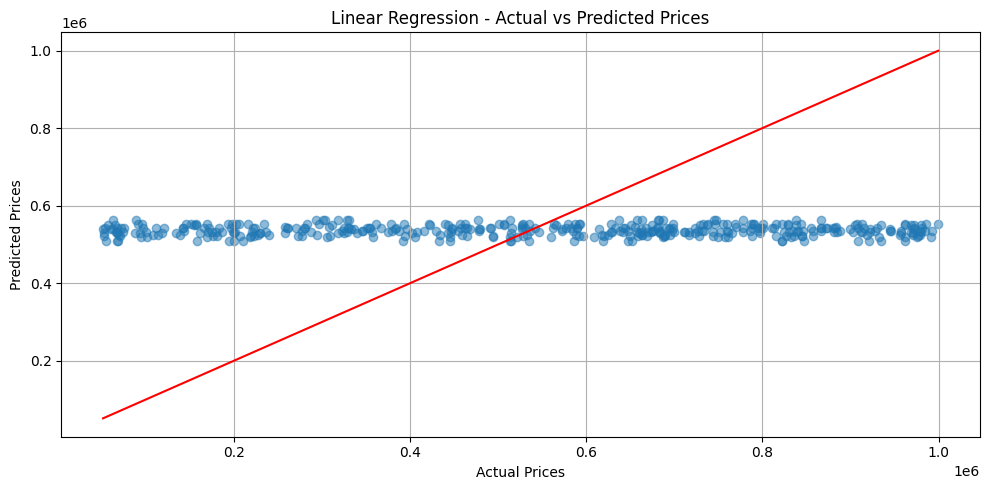


Gradient Boosting Evaluation:
MAE: 245829.89
RMSE: 285322.52


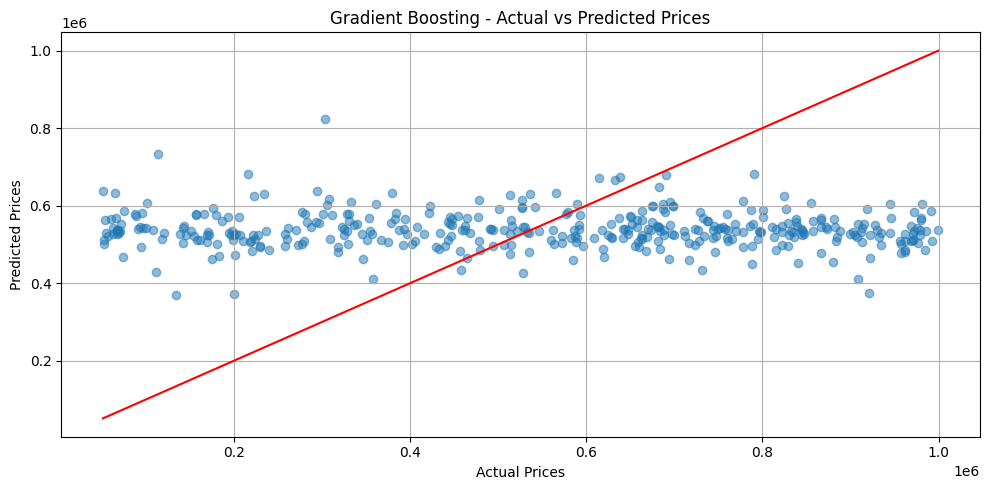

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_preds = lr_model.predict(X_test_scaled)

gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)
gb_preds = gb_model.predict(X_test)

def evaluate_predictions(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"\n{model_name} Evaluation:")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    plt.figure(figsize=(10,5))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color='red')
    plt.xlabel("Actual Prices")
    plt.ylabel("Predicted Prices")
    plt.title(f"{model_name} - Actual vs Predicted Prices")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

evaluate_predictions(y_test, lr_preds, "Linear Regression")
evaluate_predictions(y_test, gb_preds, "Gradient Boosting")